In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from math import pi
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('eplpass.csv')

This first visualization was with the help of a friend taking me through what scikit-learn can help with, it is a plot to show the outliers of the two most extreme teams with different styles, which would also help emphasis the radar chart explanation from milestone 2

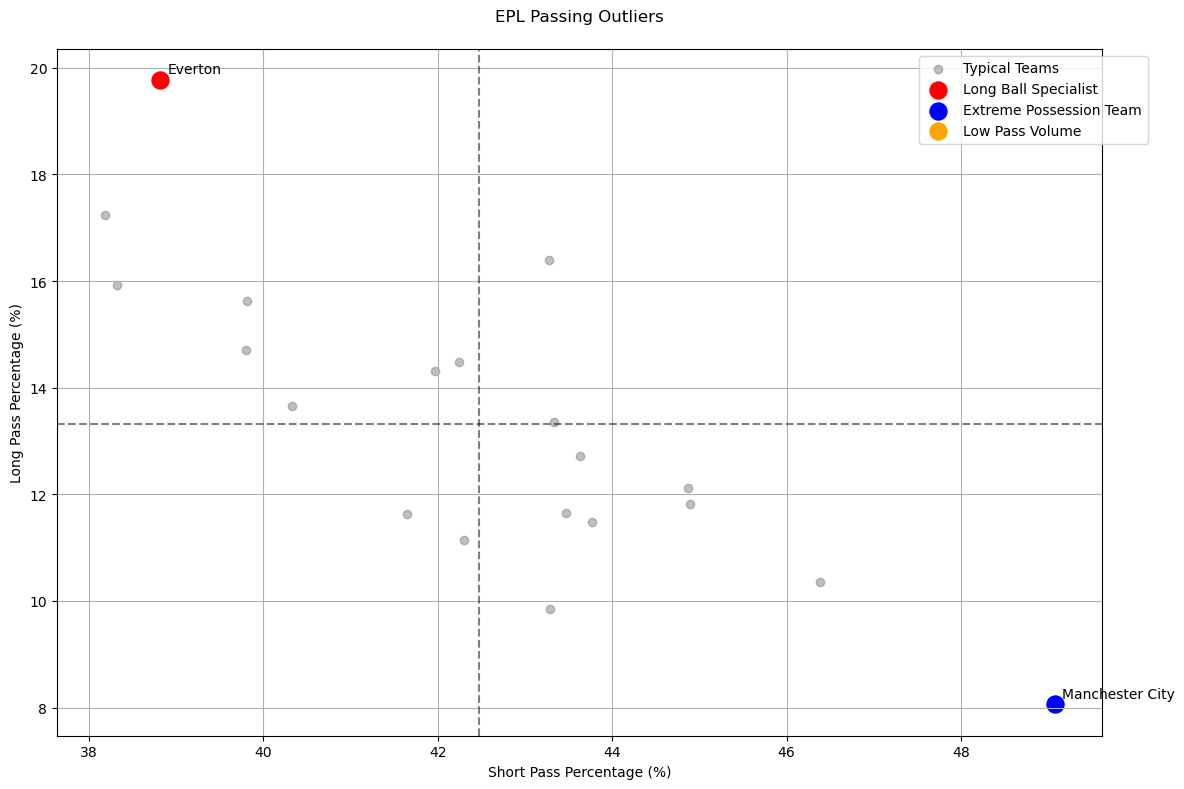

In [8]:
df['ShortPass%'] = (df['ShtAtt'] / df['TotAtt']) * 100
df['LongPass%'] = (df['LonAtt'] / df['TotAtt']) * 100
df['ProgPass/90'] = df['PrgP'] / df['90s']


league_avg = {
    'ShortPass%': df['ShortPass%'].mean(),
    'LongPass%': df['LongPass%'].mean(),
    'ProgPass/90': df['ProgPass/90'].mean()
}


df['LongPass_Z'] = (df['LongPass%'] - df['LongPass%'].mean()) / df['LongPass%'].std()
df['ShortPass_Z'] = (df['ShortPass%'] - df['ShortPass%'].mean()) / df['ShortPass%'].std()


outliers = df[(abs(df['LongPass_Z']) > 2) | (abs(df['ShortPass_Z']) > 2)].copy()
outliers['Deviation'] = outliers.apply(lambda row: 
    "Long Ball Specialist" if row['LongPass_Z'] > 2 else
    "Extreme Possession Team" if row['ShortPass_Z'] > 2 else
    "Low Pass Volume", axis=1)


plt.figure(figsize=(12, 8))


plt.scatter(df['ShortPass%'], df['LongPass%'], 
            color='gray', alpha=0.5, label='Typical Teams')


colors = {'Long Ball Specialist':'red', 
          'Extreme Possession Team':'blue',
          'Low Pass Volume':'orange'}
for dev_type, color in colors.items():
    subset = outliers[outliers['Deviation'] == dev_type]
    plt.scatter(subset['ShortPass%'], subset['LongPass%'],
               color=color, s=150, label=dev_type)


plt.axvline(league_avg['ShortPass%'], linestyle='--', color='black', alpha=0.5)
plt.axhline(league_avg['LongPass%'], linestyle='--', color='black', alpha=0.5)


for i, row in outliers.iterrows():
    plt.annotate(row['Squad'], (row['ShortPass%'], row['LongPass%']),
                 textcoords="offset points", xytext=(5,5), ha='left',
                 fontweight='bold' if abs(row['LongPass_Z']) > 2.5 else 'normal')

plt.title('EPL Passing Outliers', pad=20)
plt.xlabel('Short Pass Percentage (%)')
plt.ylabel('Long Pass Percentage (%)')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.grid(True)
plt.tight_layout()
plt.show()



This second visualization is the prototype of the idea i want to use to finish my story, where i try and define a playstyle for each team based on the way they pass the ball, i want to better this by adding the broken line feature in the first plot to it to further help with the differentiation and also add a bit of interactivity where the team name is shown when the mouse hovers it, my over the ability idea was to make the the dots on the graph the badge of the team it represents.

C:\Users\nkasa\anaconda3\envs\NKA_25\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


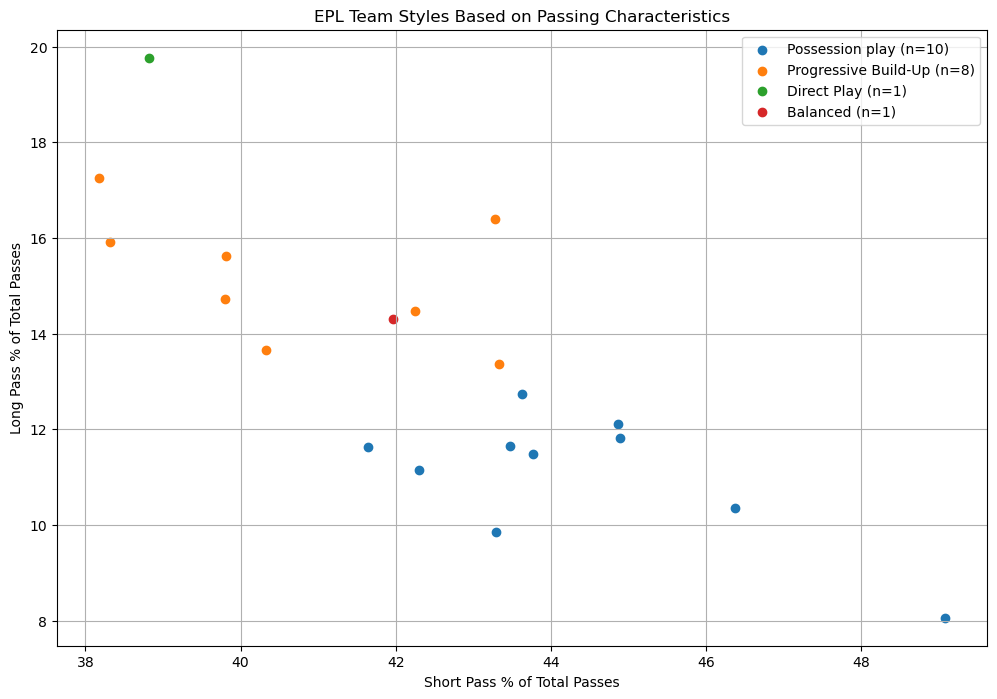


Team Style Assignments:
              Squad             StyleName
19           Wolves              Balanced
7           Everton           Direct Play
17        Tottenham       Possession play
16      Southampton       Possession play
14    Newcastle Utd       Possession play
13   Manchester Utd       Possession play
12  Manchester City       Possession play
11        Liverpool       Possession play
0           Arsenal       Possession play
5           Chelsea       Possession play
4          Brighton       Possession play
1       Aston Villa       Possession play
18         West Ham  Progressive Build-Up
10   Leicester City  Progressive Build-Up
6    Crystal Palace  Progressive Build-Up
3         Brentford  Progressive Build-Up
15  Nott'ham Forest  Progressive Build-Up
2       Bournemouth  Progressive Build-Up
8            Fulham  Progressive Build-Up
9      Ipswich Town  Progressive Build-Up


In [9]:
df['ShortPass%'] = (df['ShtAtt'] / df['TotAtt']) * 100
df['LongPass%'] = (df['LonAtt'] / df['TotAtt']) * 100
df['ProgPass/90'] = df['PrgP'] / df['90s']
df['KP/90'] = df['KP'] / df['90s']
df['Crosses/90'] = df['CrsPA'] / df['90s']

features = ['ShortPass%', 'LongPass%', 'ProgPass/90', 'KP/90', 'Cmp%']
X = df[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=4, random_state=42)
df['Style'] = kmeans.fit_predict(X_scaled)

style_names = {
    0: 'Direct Play',
    1: 'Possession play',
    2: 'Progressive Build-Up',
    3: 'Balanced'
}

df['StyleName'] = df['Style'].map(style_names)

plt.figure(figsize=(12, 8))
for style in df['Style'].unique():
    cluster_data = df[df['Style'] == style]
    plt.scatter(cluster_data['ShortPass%'], cluster_data['LongPass%'], 
                label=f'{style_names[style]} (n={len(cluster_data)})')

plt.title('EPL Team Styles Based on Passing Characteristics')
plt.xlabel('Short Pass % of Total Passes')
plt.ylabel('Long Pass % of Total Passes')
plt.legend()
plt.grid(True)
plt.show()


print("\nTeam Style Assignments:")
print(df[['Squad', 'StyleName']].sort_values('StyleName'))